Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB
None

Dataset Deskripsi:
                id    CustomerId   

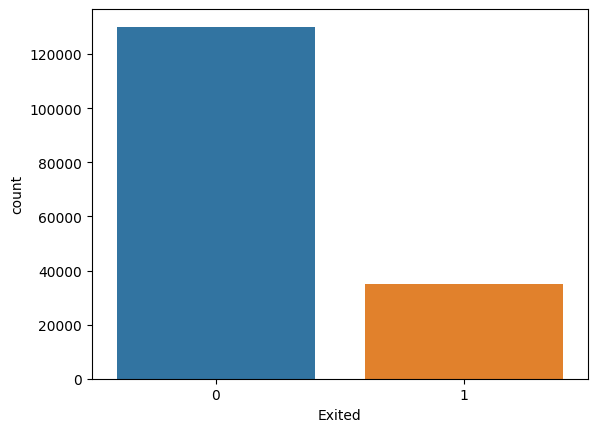

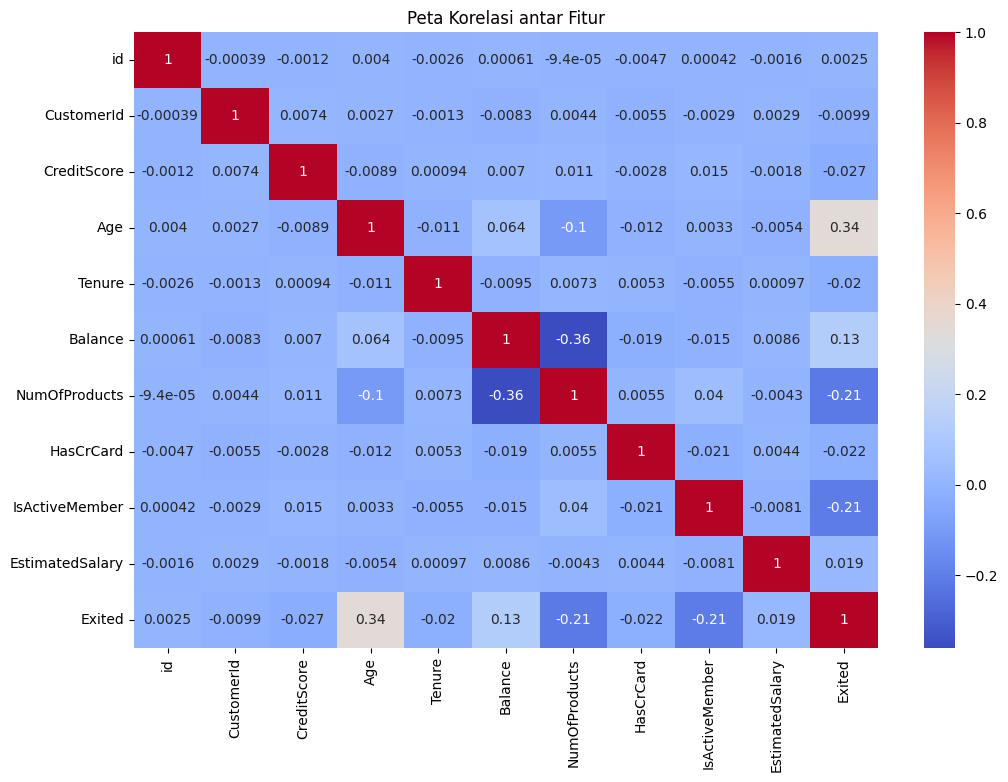

Accuracy: 0.8605

Confusion matrix:
[[24665  1387]
 [ 3217  3738]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26052
           1       0.73      0.54      0.62      6955

    accuracy                           0.86     33007
   macro avg       0.81      0.74      0.77     33007
weighted avg       0.85      0.86      0.85     33007



In [ ]:
#1) Pemahaman Data
#2) Exploratory Data Analysis (EDA)
#3) Preprocessing Data
#4) Feature Engineering
#5) Pemilihan Model
#6) Pelatihan Model
#7) Evaluasi Model
#8) Optimasi Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membaca data pelatihan
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

# Exploratory Data Analysis & statistik Deskriptif
print("Dataset Info:")
print(train_data.info())
print("\nDataset Deskripsi:")
print(train_data.describe())
print("\nHead Dataset:")
print(train_data.head())

# Distribusi Target
sns.countplot(x='Exited', data=train_data)
plt.show()

# Korelasi (hanya fitur numerik, eksklusi fitur kategori)
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_data[numeric_features].corr()
plt.figure(figsize=(12, 8))
plt.title("Peta Korelasi antar Fitur")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Cek nilai yang hilang dalam setiap kolom
missing_values = train_data.isnull().sum()

# Tampilkan kolom yang memiliki nilai yang hilang
missing_values[missing_values > 0]

# Membuat Scaler
scaler = StandardScaler()

# Memilih kolom yang akan dinormalisasi
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']
# Menggunakan dataset yang telah di-handle sebelumnya
train_data = train_data.copy()

# Mengganti nilai yang hilang dengan median untuk kolom numerik
def impute_nan_median(df, variable):
    median = df[variable].median()
    df[variable+'_median'] = df[variable].fillna(median)

for col in numeric_columns:
    impute_nan_median(train_data, col)

# Melakukan One-hot encoding pada kolom yang berbentuk kategori
train_data = pd.get_dummies(train_data, columns=["Geography", "Gender"], drop_first=True)

# Normalisasi kolom-kolom numerik setelah One-hot encoding
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])

# Menghapus kolom non-numerik dan tidak diperlukan
train_data = train_data.drop(['id', 'Surname'], axis=1)

# Memisahkan variabel target dan fitur
X = train_data.drop('Exited', axis=1)
y = train_data['Exited']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek RandomForest dan melatih model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = rf_model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion matrix:')
print(conf_matrix)
print('\nClassification report:')
print(class_report)

# Menentukan hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Melatih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Mendapatkan hyperparameter terbaik
best_params = grid_search.best_params_

print('Best Hyperparameter:')
print(best_params)

# Melakukan prediksi dengan model yang ditingkatkan
y_pred_optimized = grid_search.predict(X_test)

# Evaluasi performa model yang ditingkatkan
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
class_report_optimized = classification_report(y_test, y_pred_optimized)

print(f'\nAccuracy (Optimized): {accuracy_optimized:.4f}')
print('\nConfusion Matrix (Optimized):')
print(conf_matrix_optimized)
print('\nClassification Report (Optimized)')


print(conf_matrix_optimized)
print('\nClassification Report (Optimized):')
print(class_report_optimized)

